- - -

## LOGISTIC REGRESSION

- - -

In [61]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
iris = load_iris()

In [62]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.drop(columns='target')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [65]:
predictions = model.predict(X_test)

In [66]:
print(predictions)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [67]:
print(list(y_test))

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]


In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score

# For multiclass classification:
print("Precision:", precision_score(y_test, predictions, average='macro'))
print("Recall   :", recall_score(y_test, predictions, average='macro'))
print("F1 Score :", f1_score(y_test, predictions, average='macro'))

Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


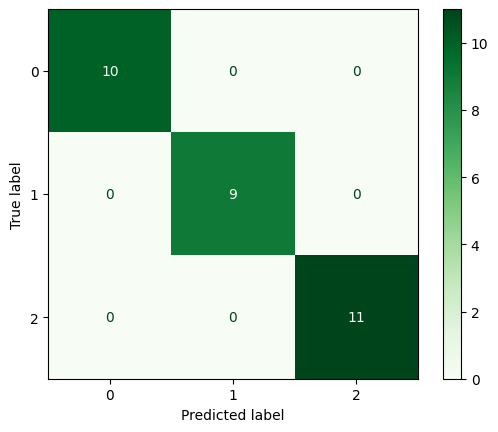

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Greens')
plt.show()

In [70]:
#Get learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    shuffle=True,
    random_state=42
)

# 4. Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

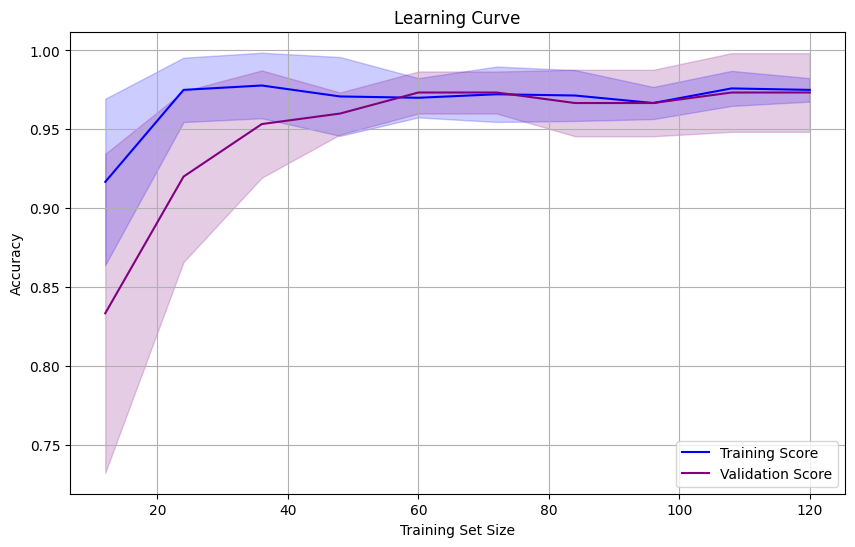

In [71]:
#Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# 5. Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_mean, label='Validation Score', color='purple')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='purple')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

- - -

**LETS TRY WITH STANDARIZATION IF WE CAN OPTIMIZE IT MORE**


In [72]:
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on scaled data
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
predictions = model.predict(X_test_scaled)

In [73]:
from sklearn.preprocessing import MinMaxScaler

# Create scaler object
scaler = MinMaxScaler()

# Fit on training data and transform both train and test
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Train the model on normalized data
model = LogisticRegression(max_iter=200)
model.fit(X_train_normalized, y_train)

# Predict and evaluate
predictions = model.predict(X_test_normalized)

In [74]:
#Get learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    shuffle=True,
    random_state=42
)

# 4. Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

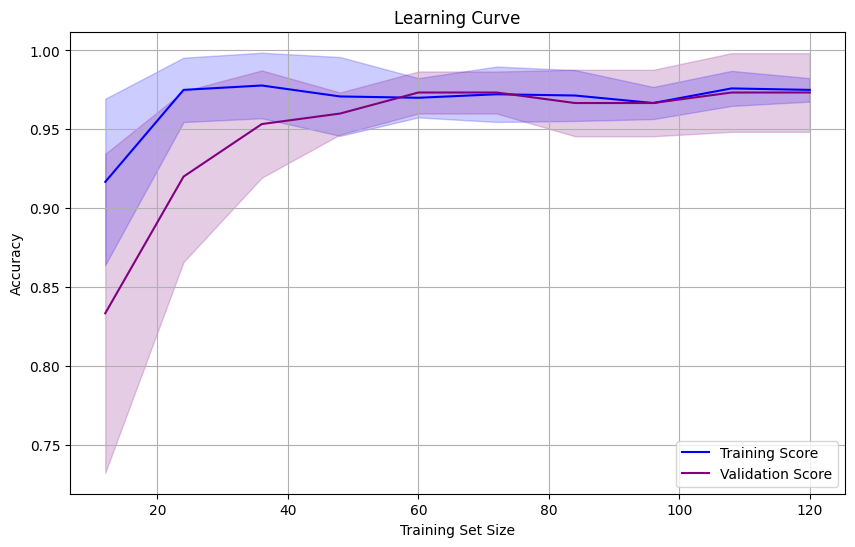

In [75]:
#Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# 5. Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_mean, label='Validation Score', color='purple')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='purple')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

- - -

# LOGISTIC REGRESSION IMPLEMENTATION FROM SCRATCH


- - -

Testing first on a different Dataset

In [76]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [77]:
bc  = datasets.load_breast_cancer()
X,y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
from LogisticRegression import LogisticRegression

In [79]:
model = LogisticRegression(lr=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/Users/azhadarshad/Desktop/EVERYTHING PYTHON/practice_ml/LogisticRegression.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


In [80]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/len(y_test)

In [81]:
acc = accuracy(y_pred, y_test)
print("Accuracy of custom Logistic Regression:", acc)

Accuracy of custom Logistic Regression: 0.9473684210526315


In [82]:
def confusion_matrix(y_true, y_pred):

    y_true = np.array(y_true).astype(int)
    y_pred = np.array(y_pred).astype(int)
    
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    return TP, TN, FP, FN

In [83]:
TP, TN, FP, FN = confusion_matrix(y_test, y_pred)

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

print("Accuracy:", accuracy(y_pred, y_test))

True Positives: 65
True Negatives: 43
False Positives: 0
False Negatives: 6
Accuracy: 0.9473684210526315


In [84]:
print("y_test[:10]:", y_test[:10])
print("y_pred[:10]:", y_pred[:10])

y_test[:10]: [1 0 0 1 1 0 0 0 1 1]
y_pred[:10]: [0, 0, 0, 1, 1, 0, 0, 0, 1, 1]


In [85]:
def precision_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    return TP / (TP + FP + 1e-15)  # avoid division by zero

def recall_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP / (TP + FN + 1e-15)

def f1_score(y_true, y_pred):
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec + 1e-15)


⸻

🔍 Meaning of Each Metric

📌 1. Precision

“When the model predicted positive, how often was it correct?”

Formula:
$$ \text{Precision} = \frac{TP}{TP + FP} $$

High precision means:
	•	Few false positives.
	•	Your model doesn’t raise false alarms.

🧠 Good when false positives are costly (e.g., spam filter, cancer diagnosis).

📌 2. Recall

“Out of all actual positives, how many did the model catch?”

Formula:
$$ \text{Recall} = \frac{TP}{TP + FN} $$

High recall means:
	•	Few false negatives.
	•	Your model doesn’t miss actual positives.

🧠 Important when false negatives are costly (e.g., detecting fraud or disease).

⸻

📌 3. F1-Score

“Balance between precision and recall.”

Formula:
$$ F1 = \frac{2 \cdot (\text{Precision} \cdot \text{Recall})}{\text{Precision} + \text{Recall}} $$
	•	1.0 = perfect precision + recall
	•	Low F1 = imbalance or poor performance in both

🧠 Best when you want a trade-off (e.g., general binary classification).



In [86]:
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

Precision: 1.0000
Recall:    0.9155
F1 Score:  0.9559


In [87]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[43  0]
 [ 6 65]]


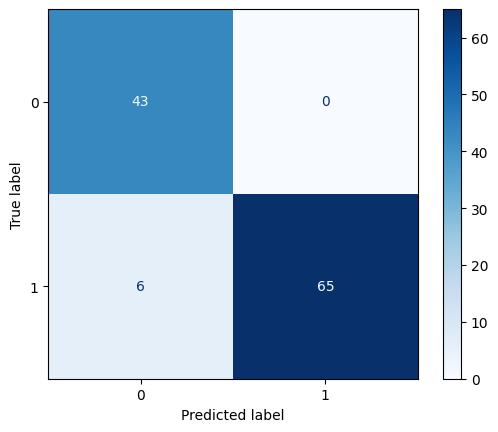

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

- - -

# NOW IMPLEMENTED FROM SCRATCH LOGISTIC REGRESSION FOR IRIS DATASET

- - -

In [89]:
X,y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
model = LogisticRegression(lr=0.001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [91]:
from sklearn.metrics import precision_score, recall_score, f1_score

# For multiclass classification:
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall   :", recall_score(y_test, y_pred, average='macro'))
print("F1 Score :", f1_score(y_test, y_pred, average='macro'))

Precision: 0.09999999999999999
Recall   : 0.3333333333333333
F1 Score : 0.15384615384615385


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


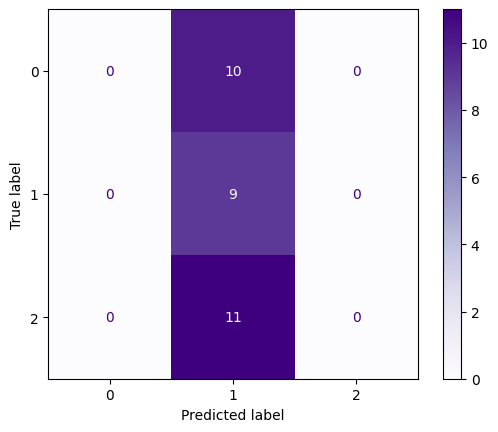

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Purples')

In [93]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0 10  0]
 [ 0  9  0]
 [ 0 11  0]]


__THE SCRATCH IMPLEMENTATION DIDNT WORK WELL FOR THE IRIS DATASET DUE TO IT BEING MADE FOR BINARY CLASSIFICATION ONLY,IN NEXT IMPLEMENTATION  WE SHOULD TRY USING SOFTMAX WITH CROSS ENTROPY FOR MULTI-CLASS CLASSIFICATION__

- - -


# SOFTMAX IMPLEMENTAION

In [97]:
import numpy as np

# --------------------------
# Activation Function: Softmax
# --------------------------
def softmax(z):
    """
    Compute softmax values for each set of scores in z.
    
    Args:
        z (ndarray): Shape (n_samples, n_classes)
    
    Returns:
        probs (ndarray): Same shape as z, with probabilities for each class
    """
    exp_values = np.exp(z - np.max(z, axis=1, keepdims=True))  # for numerical stability
    probs = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    return probs

# --------------------------
# Softmax Regression Model
# --------------------------
class SoftmaxRegression:
    def __init__(self, lr=0.01, epochs=1000):
        """
        Initialize model with learning rate and number of training iterations.
        
        Args:
            lr (float): Learning rate
            epochs (int): Number of iterations to train
        """
        self.lr = lr
        self.epochs = epochs
        self.W = None  # Weight matrix
        self.b = None  # Bias vector

    def fit(self, X, y):
        """
        Train the model using training data.
        
        Args:
            X (ndarray): Training features of shape (n_samples, n_features)
            y (ndarray): Class labels of shape (n_samples,)
        """
        n_samples, n_features = X.shape
        n_classes = np.max(y) + 1  # Assuming classes are labeled 0 to n-1

        # Initialize weights and bias
        self.W = np.zeros((n_features, n_classes))  # shape: (features, classes)
        self.b = np.zeros((1, n_classes))           # shape: (1, classes)

        # Convert y to one-hot encoding: shape (n_samples, n_classes)
        y_one_hot = np.eye(n_classes)[y]

        # Training loop
        for _ in range(self.epochs):
            # Linear prediction
            logits = np.dot(X, self.W) + self.b  # shape: (n_samples, n_classes)

            # Apply softmax to get probabilities
            probs = softmax(logits)

            # Compute gradients
            error = probs - y_one_hot  # shape: (n_samples, n_classes)
            dw = (1 / n_samples) * np.dot(X.T, error)     # shape: (n_features, n_classes)
            db = (1 / n_samples) * np.sum(error, axis=0, keepdims=True)  # shape: (1, n_classes)

            # Update weights and biases
            self.W -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        """
        Predict class labels for input data.
        
        Args:
            X (ndarray): Input features of shape (n_samples, n_features)
        
        Returns:
            y_pred (ndarray): Predicted class labels of shape (n_samples,)
        """
        logits = np.dot(X, self.W) + self.b
        probs = softmax(logits)
        y_pred = np.argmax(probs, axis=1)
        return y_pred

In [98]:
# Initialize and train model
model = SoftmaxRegression(lr=0.1, epochs=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall   :", recall_score(y_test, y_pred, average='macro'))
print("F1 Score :", f1_score(y_test, y_pred, average='macro'))

Accuracy: 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


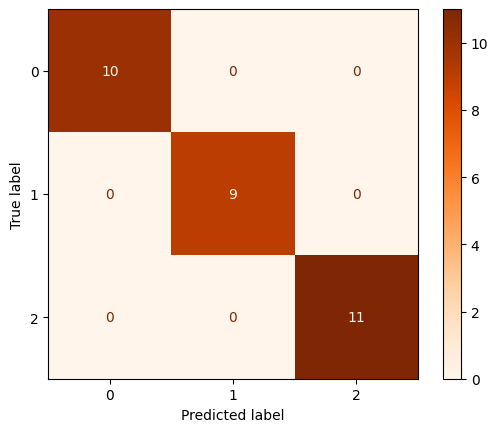

In [99]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Oranges')